In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks
import plotly.graph_objects as go
import chart_studio 
from plotly.offline import init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

# Data Cleaning

In [5]:
for i in df.columns:
    print(i + " : " + str(df[i].nunique()))

Car_Name : 98
Year : 16
Selling_Price : 156
Present_Price : 148
Driven_kms : 206
Fuel_Type : 3
Selling_type : 2
Transmission : 2
Owner : 3


In [6]:
round((df.isnull().sum())/100,2)

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Driven_kms       0.0
Fuel_Type        0.0
Selling_type     0.0
Transmission     0.0
Owner            0.0
dtype: float64

#### It appears that there is no missing data

# Exploratory Data Analysis

## Univariate Analysis

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


###### Let's look at each categorical feature seperately

##### Fuel Type

- Types
- Count
- Percentage
- Statistical Summary

###### Fuel Type - Types

In [8]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [9]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

###### Fuel Type - Percentage

In [10]:
# Creating a Series with percentage of each category
fuel_type_percent = df['Fuel_Type'].value_counts()/len(df['Fuel_Type'])*100
# adding a percentage sign and rounding off to 2 decimal places
fuel_type_percent = round(fuel_type_percent,2).astype(str) + '%'
fuel_type_percent

Fuel_Type
Petrol     79.4%
Diesel    19.93%
CNG        0.66%
Name: count, dtype: object

##### Fuel Type - Statistical Summary

In [11]:
px.bar(df,"Fuel_Type")

In [12]:
df['Fuel_Type'].describe()

count        301
unique         3
top       Petrol
freq         239
Name: Fuel_Type, dtype: object

###### Year

- Year wise count
- Year wise percentage
- Most common year
- Least common year
- Statistical Summary

###### Year - Year wise count

In [13]:
df['Year'].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

###### Year - Year wise percentage

In [14]:
year_wise = df['Year'].value_counts()/len(df['Year'])*100
year_wise = round(year_wise,2).astype(str)+"%"
year_wise

Year
2015    20.27%
2016    16.61%
2014    12.62%
2017    11.63%
2013    10.96%
2012     7.64%
2011     6.31%
2010     4.98%
2008     2.33%
2009     1.99%
2006     1.33%
2005     1.33%
2003     0.66%
2007     0.66%
2018     0.33%
2004     0.33%
Name: count, dtype: object

###### Year - Most common year

From the above data we can infer that the year 2015 is the most common year and has probably sold the most number of cars 

###### Year - Least common year

From the above data we can infer that the year 2009 is the most common year and has probably sold the least number of cars 

###### Year - Statistical Summary

In [15]:
px.histogram(df,x="Year",title="Year Count")

In [16]:
df['Year'].describe()

count     301.000000
mean     2013.627907
std         2.891554
min      2003.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: Year, dtype: float64

In [17]:
df["Year"].sort_values().median()

2014.0

In [18]:
df["Year"].sort_values().mode()

0    2015
Name: Year, dtype: int64

###### Selling Type

- Types
- Count
- Percentage
- Statistical Summary

1) Types

In [19]:
df['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

2) Count

In [20]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

3) Percentage

In [21]:
px.bar(df,"Selling_type",title="Selling Type Count",color="Selling_type")

In [22]:
selling_type_percent = df['Selling_type'].value_counts()/len(df['Selling_type'])*100
selling_type_percent = round(selling_type_percent,2).astype(str)+"%"
selling_type_percent

Selling_type
Dealer        64.78%
Individual    35.22%
Name: count, dtype: object

4) Statistical Summary

In [23]:
"Dealers have sold more cars than indiviuduals"

'Dealers have sold more cars than indiviuduals'

##### Transmission

- Types
- Count
- Percentage
- Statistical Summary

In [24]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [26]:
transmission_percent = df['Transmission'].value_counts()/len(df['Transmission'])*100
transmission_percent = round(transmission_percent,2).astype(str)+"%"
transmission_percent

Transmission
Manual       86.71%
Automatic    13.29%
Name: count, dtype: object

In [27]:
"""From the above data we can infer that the most common transmission type is Manual"""

'From the above data we can infer that the most common transmission type is Manual'

In [28]:
px.bar(df,"Transmission",title="Transmission Count",color="Transmission")

In [29]:
df['Transmission'].describe()

count        301
unique         2
top       Manual
freq         261
Name: Transmission, dtype: object

###### Owner

- Types
- Count
- Percentage
- Statistical Summary

In [30]:
df['Owner'].unique()

array([0, 1, 3])

In [31]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [32]:
owner_percent = df['Owner'].value_counts()/len(df['Owner'])*100
owner_percent = round(owner_percent,2).astype(str)+"%"
owner_percent

Owner
0    96.35%
1     3.32%
3     0.33%
Name: count, dtype: object

<Axes: xlabel='Owner'>

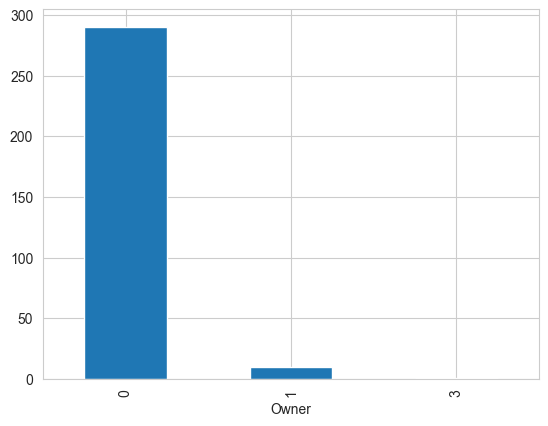

In [33]:
"""I wanna plot the number of owners vs their occurrences in a plot"""
df['Owner'].value_counts().plot(kind="bar")

In [48]:
"""From the above data we can infer that the most common owner type is First Owner and the least is Third Owner"""

'From the above data we can infer that the most common owner type is First Owner and the least is Third Owner'

###### Selling Price

- Statistical Summary
- Distribution
- Outliers

In [50]:
df['Selling_Price'].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

<Axes: ylabel='Count'>

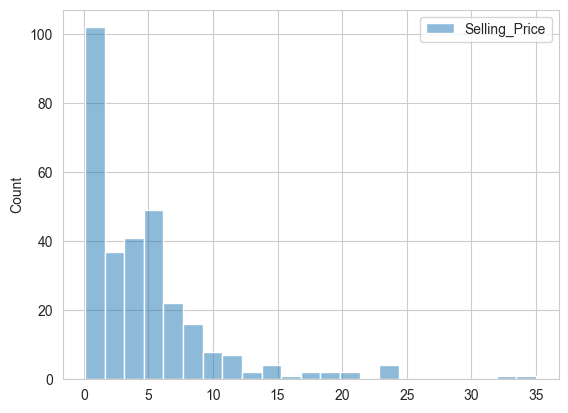

In [56]:
sns.histplot(df["Selling_Price"])

In [58]:
px.scatter(df,"Selling_Price")

In [49]:
px.density_heatmap(data_frame=df,x="Selling_Price")

In [50]:
"""From the above heatmap we can infer that most of the cars sold are not of the premium segment. They are mostly in the 0 - 7.5 L range max"""

'From the above heatmap we can infer that most of the cars sold are not of the premium segment. They are mostly in the 0 - 7.5 L range max'

In [63]:
# Finding outliers
px.box(df,x="Selling_Price")

In [64]:
"""We can infer that there are a lot of outliers in this dataset for the Selling Price. We'll figure out a way to eliminate them"""

"We can infer that there are a lot of outliers in this dataset for the Selling Price. We'll figure out a way to eliminate them"

#### Present Price

- Statistical Summary
- Plots
- Outliers

In [59]:
df.Present_Price.describe()

count    301.000000
mean       7.628472
std        8.642584
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

In [65]:
"""From the statistical summary, we can infer that there might be potentially a lot of outliers for example the max value is far far away from probably the Q4"""

'From the statistical summary, we can infer that there might be potentially a lot of outliers for example the max value is far far away from probably the Q4'

In [68]:
px.histogram(df,"Present_Price")

In [69]:
px.scatter(df,"Present_Price")

In [70]:
"""I can see a similar pattern amongst the Selling Price and Present Price in the dataset"""

'I can see a similar pattern amongst the Selling Price and Present Price in the dataset'

In [72]:
"""Let's us have a look at outliers in this dataset"""

"Let's us have a look at outliers in this dataset"

In [78]:
px.box(df,"Present_Price",title="Present Price outliers")

In [79]:
"""There are a lot of outliers in this dataset, especially the continuous variables have a lot of outliers"""

'There are a lot of outliers in this dataset, especially the continuous variables have a lot of outliers'

#### Driven KMs

- Statistical Summary
- Plots
- Outliers

In [80]:
df["Driven_kms"].describe()

count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Driven_kms, dtype: float64

In [87]:
df["Driven_kms"].min()

500

##### Plots

In [100]:
px.histogram(df,"Driven_kms",nbins=40)

In [101]:
"""There exists a lot of noise above 100000 range, but the majority of the data lies in that range, so we'll ignore the remaining"""

"There exists a lot of noise above 100000 range, but the majority of the data lies in that range, so we'll ignore the remaining"

<Axes: xlabel='Driven_kms', ylabel='Count'>

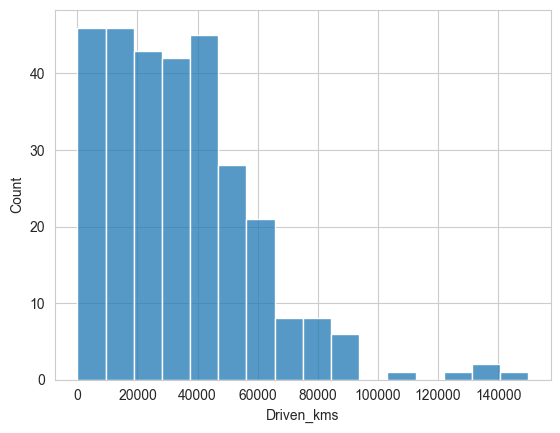

In [102]:
sns.histplot(df["Driven_kms"],binrange=(0,150000))

In [104]:
"""The distribution is majorly right tailed, so we can say there exists a huge requirement for outlier treatment"""

'The distribution is majorly right tailed, so we can say there exists a huge requirement for outlier treatment'

### Outlier analysis

In [105]:
px.box(df,"Driven_kms")

In [106]:
"""THe outliers are too huge in this feature, we'll figure a way out"""

"THe outliers are too huge in this feature, we'll figure a way out"

## Bivariate Analysis

Heatmap of Correlation

<Axes: >

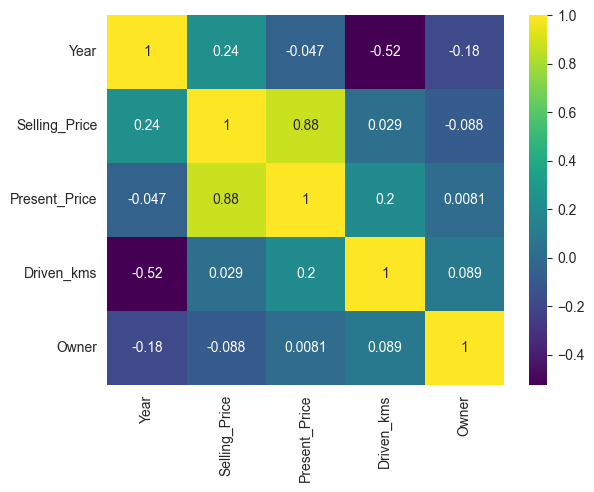

In [113]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis")

From the above plot we can infer that

- Present Price and Selling Price have a strong correlation
- The kilometers driven and the Year in which it was sold have an inverse proportion
- The owner and year have a negative correlation
- There exists no other correlation which can be useful

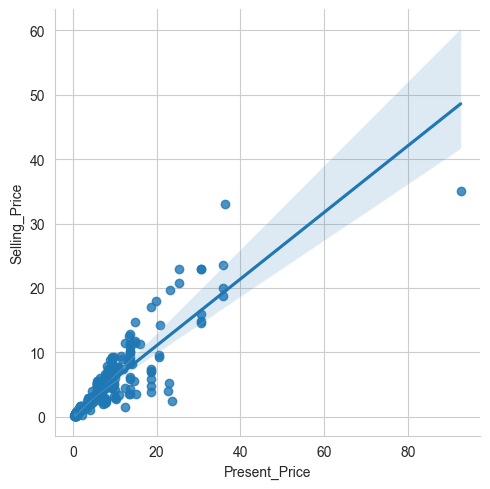

In [118]:
# Making a plot of correlation between Present_Price and Selling_Price with a regression line
sns.lmplot(x="Present_Price",y="Selling_Price",data=df)

In [120]:
# Let us make the plot more interactive with plotly
px.scatter(df,x="Present_Price",y="Selling_Price",trendline="ols")

In [121]:
"""From the above plot we can infer that there exists a strong correlation between the Present Price and Selling Price and majority of the data lies in the 0-17/19 Lakhs range"""

'From the above plot we can infer that there exists a strong correlation between the Present Price and Selling Price and majority of the data lies in the 0-17/19 Lakhs range'

In [122]:
# Let us make a plot of the correlation between the Year and Selling Price
px.scatter(df,x="Year",y="Selling_Price",trendline="ols")

In [123]:
"""From the above  plot we can infer that the Year and SElling Price have a gradual inclination in trend which means recent cars have a higher selling price, which is obvious"""

'From the above  plot we can infer that the Year and SElling Price have a gradual inclination in trend which means recent cars have a higher selling price, which is obvious'

In [124]:
# Let us make a plot of the correlation between the Driven Kms and Selling Price
px.scatter(df,x="Driven_kms",y="Selling_Price",trendline="ols")

In [125]:
"""From the above plot we can infer that the relation is quite confusing, and to summarize the distribution is spread all across the place, but most of the data lies within the 100k range"""

'From the above plot we can infer that the relation is quite confusing, and to summarize the distribution is spread all across the place, but most of the data lies within the 100k range'

In [126]:
# Let us make a plot of the correlation between the Owner and Selling Price
px.scatter(df,x="Owner",y="Selling_Price",trendline="ols")

In [127]:
"""Honestly the data is very insufficient to answer this question but we can infer that the more the number of owners, the lesser the selling price"""

'Honestly the data is very insufficient to answer this question but we can infer that the more the number of owners, the lesser the selling price'

In [129]:
# Feature encoding of Fuel Type variable
fuels = {"Petrol":0,"Diesel":1,"CNG":2}
df["Fuel_Type"] = df["Fuel_Type"].map(fuels)
df["Fuel_Type"].value_counts()

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64

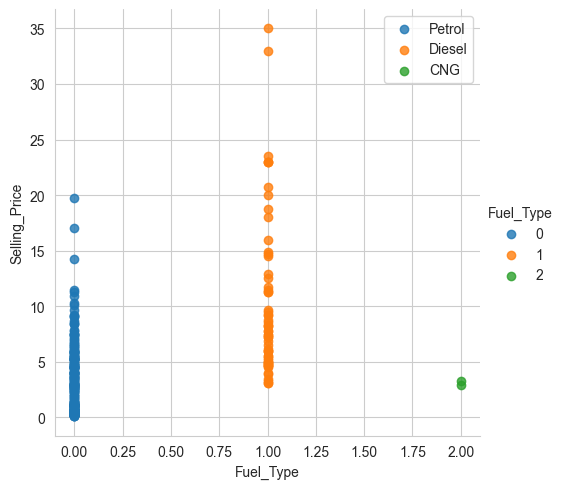

In [143]:
sns.lmplot(x="Fuel_Type",y="Selling_Price",data=df,fit_reg=False,hue="Fuel_Type")
plt.legend(labels=["Petrol","Diesel","CNG"])

In [144]:
"""From the above plot we can infer that diesel fuelled vehicles are a bit more expensive and the CNG data is very less and insufficient """

'From the above plot we can infer that diesel fuelled vehicles are a bit more expensive and the CNG data is very less and insufficient '

In [145]:
# Feature encoding of Transmission variable
transmission = {"Manual":0,"Automatic":1}
df["Transmission"] = df["Transmission"].map(transmission)

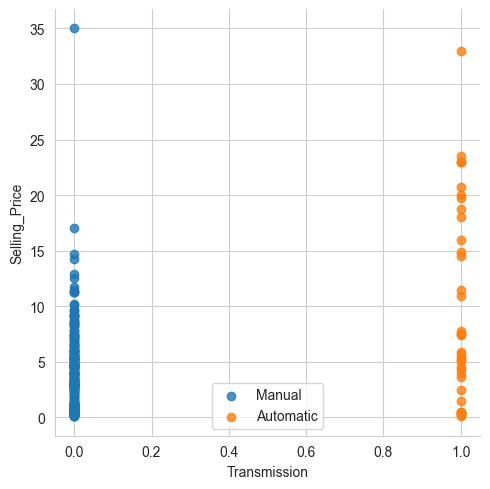

In [147]:
sns.lmplot(x="Transmission",y="Selling_Price",data=df,fit_reg=False,hue="Transmission",legend=False)
plt.legend(labels=["Manual","Automatic"])

In [148]:
# Feature encoding of Selling Type variable
selling_type = {"Dealer":0,"Individual":1}
df["Selling_type"] = df["Selling_type"].map(selling_type)


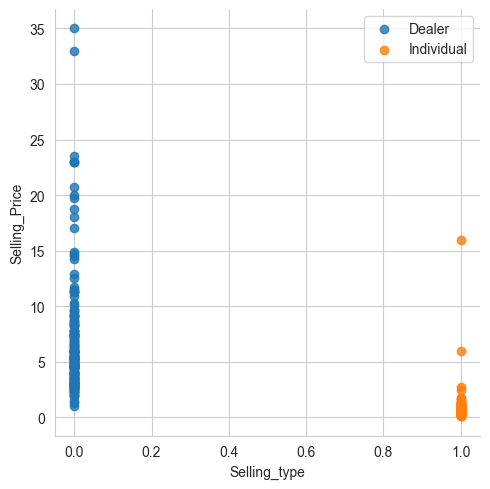

In [149]:
sns.lmplot(x="Selling_type",y="Selling_Price",data=df,fit_reg=False,hue="Selling_type",legend=False)
plt.legend(labels=["Dealer","Individual"])

In [150]:
"""From the above plot we can infer that individual sellers sell at a less price, which might be due to low bargaining power or less knowledge of the market"""

'From the above plot we can infer that individual sellers sell at a less price, which might be due to low bargaining power or less knowledge of the market'

In [152]:
# Getting columns which are non numeric
df.select_dtypes(exclude=np.number).columns

Index(['Car_Name'], dtype='object')

In [156]:
"Let us look at the car which has sold for the maximum price"
df[df["Selling_Price"]==df["Selling_Price"].max()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,1,0,0,0


In [157]:
"""Let us look at the car which has sold for the least price"""

'Let us look at the car which has sold for the least price'

In [161]:
df[df["Selling_Price"] == df["Selling_Price"].min()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
200,Bajaj Pulsar 150,2006,0.1,0.75,92233,0,1,0,0
